# Base ResNet GradCam PoC

In [3]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights

import os, re
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load sample image

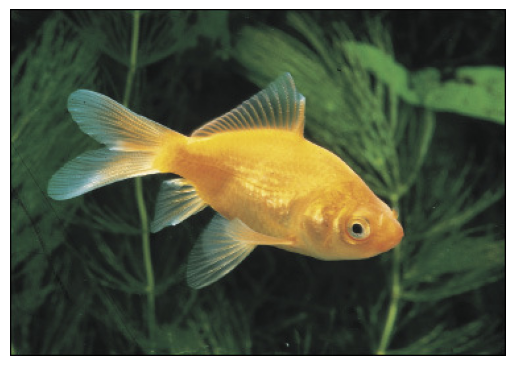

In [2]:
image = Image.open('imagenet_samples/goldfish.jpeg').convert('RGB')

plt.imshow(image)
plt.axis('off')
plt.show()

Run ResNet on image

In [11]:
resnet_classes = np.array(open('imagenet_samples/classes.txt').read().splitlines())
len(resnet_classes)

1000

In [20]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model.eval()

image_t = transforms.ToTensor()(image)
logits = model(image_t.unsqueeze(0)).squeeze()
propabilities = torch.sigmoid(logits)
predictions = (propabilities > 0.9).int()
best_class = propabilities.argmax().item()
best_class_name = resnet_classes[best_class]

print(f'Best class: {best_class_name} ({best_class})')

Best class: goldfish, Carassius auratus (1)


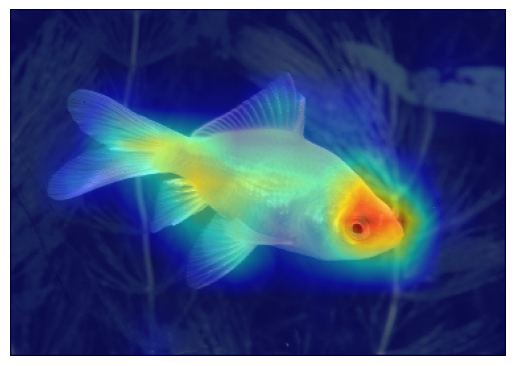

In [24]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

target_layers = [model.layer4[-1]]
targets = [ClassifierOutputTarget(best_class)]

with GradCAM(model=model, target_layers=target_layers) as gradcam:
    cam = gradcam(input_tensor=image_t.unsqueeze(0), targets=targets)
    img = np.array(image, dtype=np.float32) / 255.0
    cam_img = show_cam_on_image(img, cam[0], use_rgb=True)
    plt.imshow(Image.fromarray(cam_img))
    plt.axis('off')
    plt.show()